# **Task 1 EDA**

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.data_processing import *

# Load Data

In [4]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)

In [5]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# Properties of the Data

In [6]:
data.shape

(1000098, 52)

**There are 1000098 rows and 52 columns in the data.**

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

**There are 37 categorical columns and 15 numerical columns.** <br>
    ===> bool-type -1 <br>
    ===> float-type - 11 <br>
    ===> int-type - 4 <br>
    ===> object - 36 <br>

In [9]:
data.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [12]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [13]:
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

# Checking the Quality of Data

# Checking Null Values

In [14]:
print(data.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

# Number of Duplicate Values

In [15]:
print(f"Number of Duplicate rows: {data.duplicated().sum()}")

Number of Duplicate rows: 0


# Missing Values

In [17]:
calculate_missing_percentage(data)

The dataset has 9.74% missing values.


In [18]:
missing_data = check_missing_values(data)
missing_data

,Missing Values,% of Total Values,Data type
NumberOfVehiclesInFleet,1000098,100.00,float64
CrossBorder,999400,99.93,object
CustomValueEstimate,779642,77.96,float64
Rebuilt,641901,64.18,object
Converted,641901,64.18,object
WrittenOff,641901,64.18,object
NewVehicle,153295,15.33,object
Bank,145961,14.59,object
AccountType,40232,4.02,object
Gender,9536,0.95,object


The dataframe contains 52 columns, of which 22 have missing values. <br>

**Handling Missing values**<br>
Drop columns with a high percentage of missing values and impute remaining missing values.<br>

Drop columns with high percentage of missing values (>50%): <br>
===> NumberOfVehiclesInFleet(100% missing)<br>
===> CrossBorder (99.93 %)<br>
===> CustomValueEstimate(77.96%)<br>
===> Rebuilt(64.18%)<br>
===> Converted(64.18%)<br>
===> WrittenOff(64.18%)<br>

In [19]:
data_cleaned= drop_high_missing_columns(data)

Dropped columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


**For the remaining data:**<br>
===>For categorical columns, impute missing values using the mode (most frequent value).<br>
===>For numerical columns, use the median to fill in missing values.<br>

In [21]:
data= impute_missing_values(data_cleaned)

**Checking the missing values of the cleaned data.**

In [22]:
missing_data = check_missing_values(data)
missing_data

,Missing Values,% of Total Values,Data type
UnderwrittenCoverID,0,0.0,int64
PolicyID,0,0.0,int64
TransactionMonth,0,0.0,object
IsVATRegistered,0,0.0,bool
Citizenship,0,0.0,object
LegalType,0,0.0,object
Title,0,0.0,object
Language,0,0.0,object
Bank,0,0.0,object
AccountType,0,0.0,object


**Convert the 'VehicleIntroDate' from an object to datetime format to perform time-based analysis.**

In [23]:
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='mixed', utc=True)

# Missing Data Imputation

In [24]:
data['Title'].unique()

array(['Mr', 'Dr', 'Miss', 'Mrs', 'Ms'], dtype=object)

In [25]:
data['Gender'].unique()

array(['Not specified', 'Male', 'Female'], dtype=object)

In [26]:
count = (data['Gender'] == 'Not specified').sum()

print(count)

950526


In [27]:
# Define mappings for Title to Gender
title_to_gender = {
    'Mr': 'Male',
    'Mrs': 'Female',
    'Miss': 'Female',
    'Ms': 'Female',
}

# Update Gender based on Title where Gender is 'not specified'
data.loc[(data['Gender'] == 'Not specified') & (data['Title'] != 'Dr'), 'Gender'] = data['Title'].map(title_to_gender)

In [28]:
count = (data['Gender'] == 'Not specified').sum()

print(count)

810


# **Univariate Analysis**

Plot histograms for numerical columns and bar charts for categorical columns to understand distributions for the selected key columns from the dataset. <br>

**Distribution of numerical columns**

Histograms for Numerical Columns:


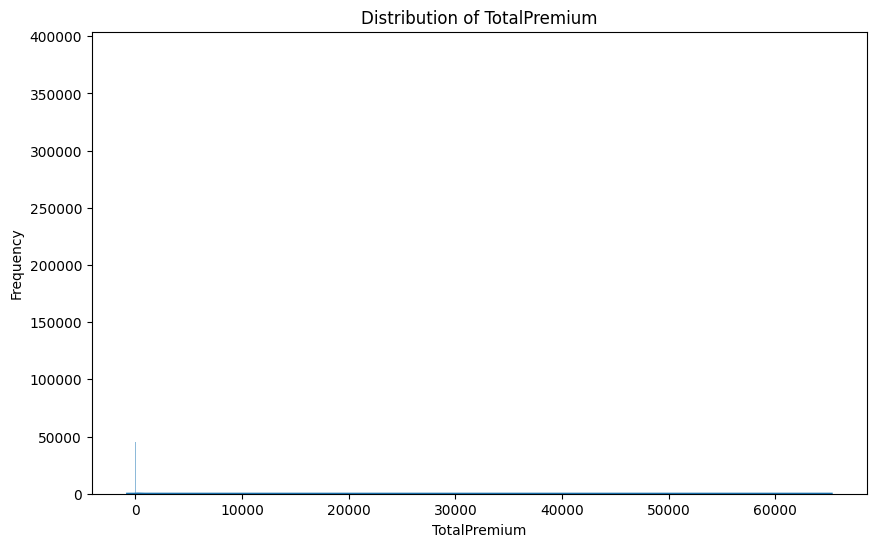

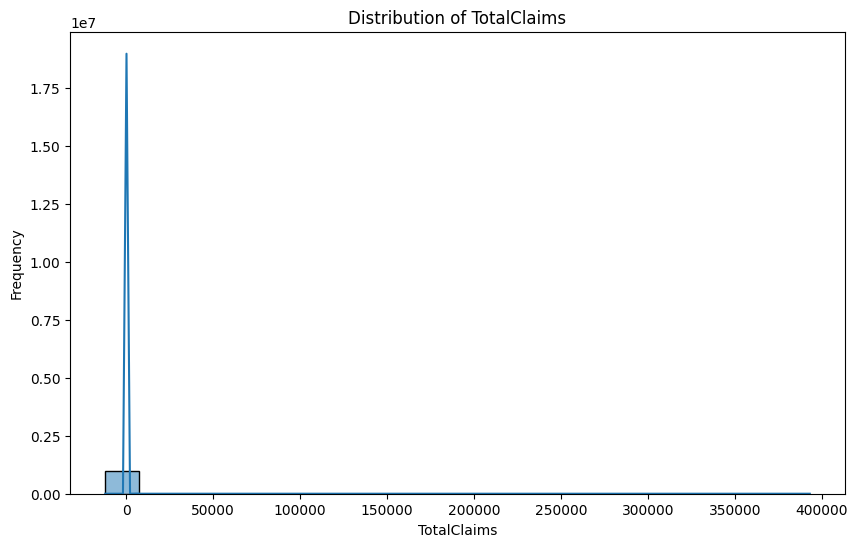

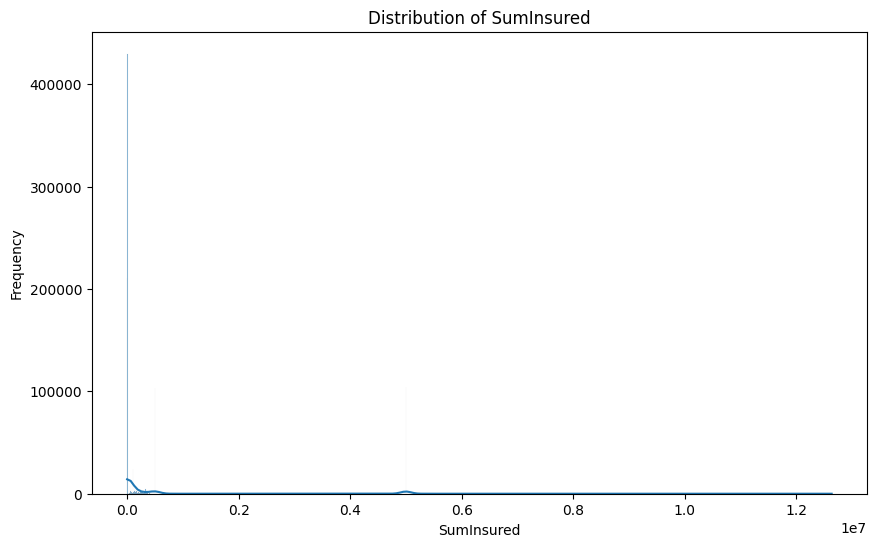

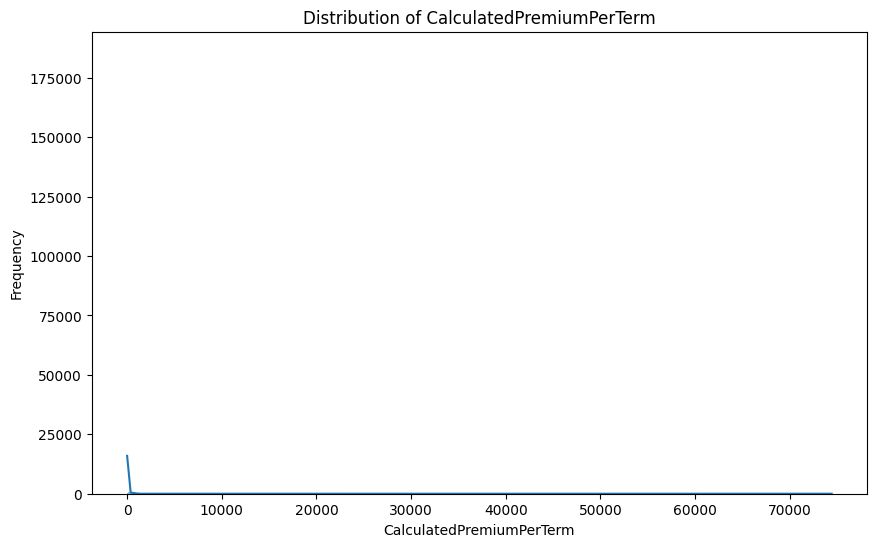

In [30]:
numerical_columns= ['TotalPremium',	 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

# Plot histograms for key numerical columns
print("Histograms for Numerical Columns:")
for col in numerical_columns:
    plot_histogram(data, col)

**Distribution of categorical columns**

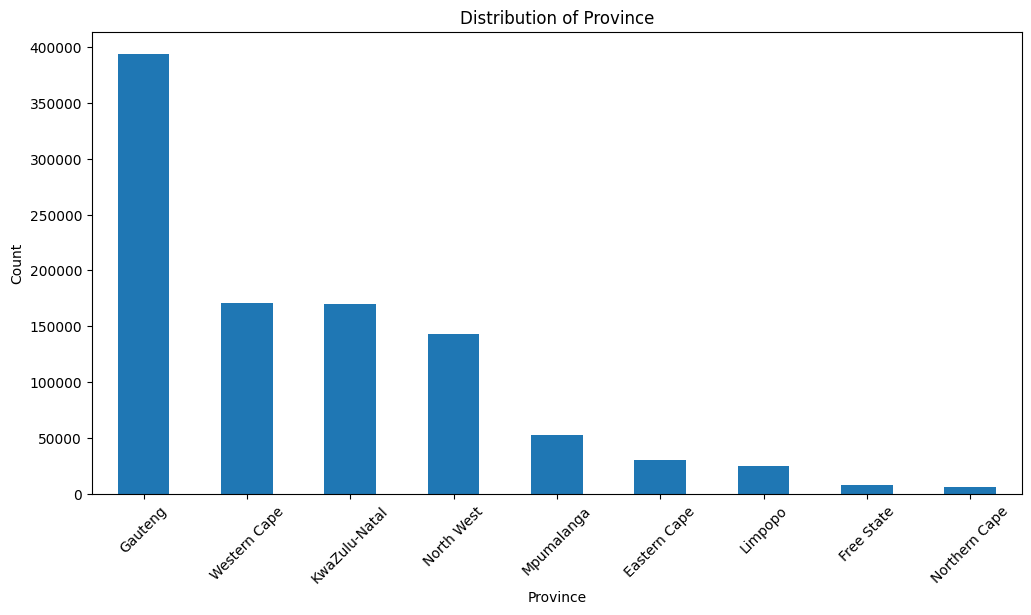

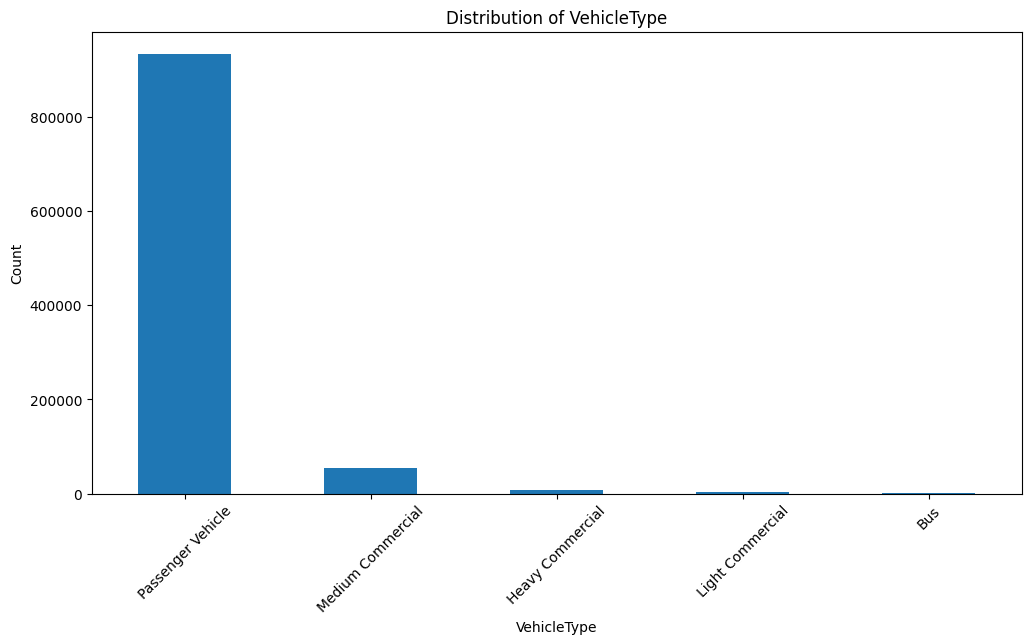

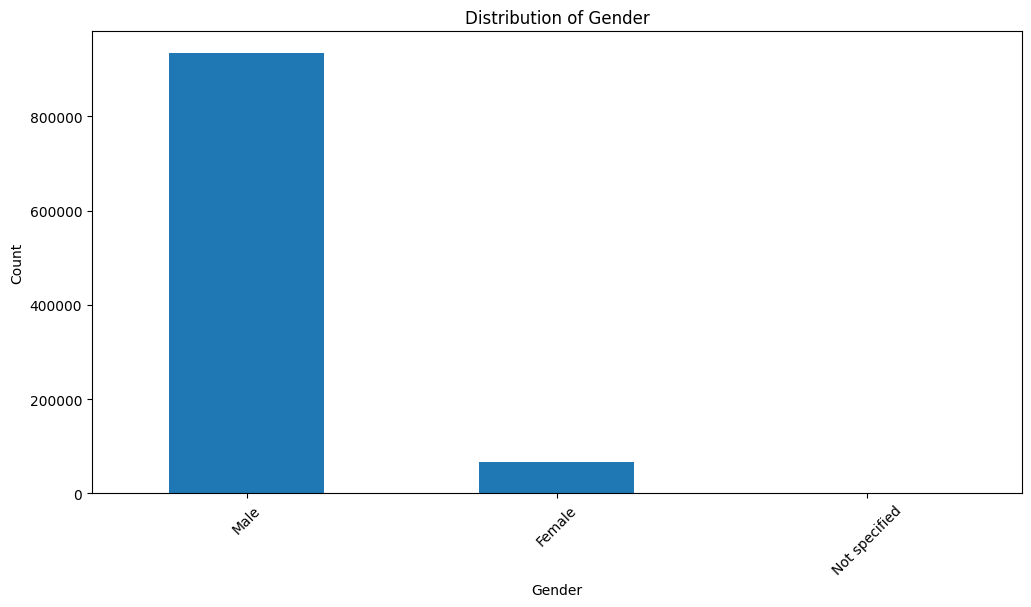

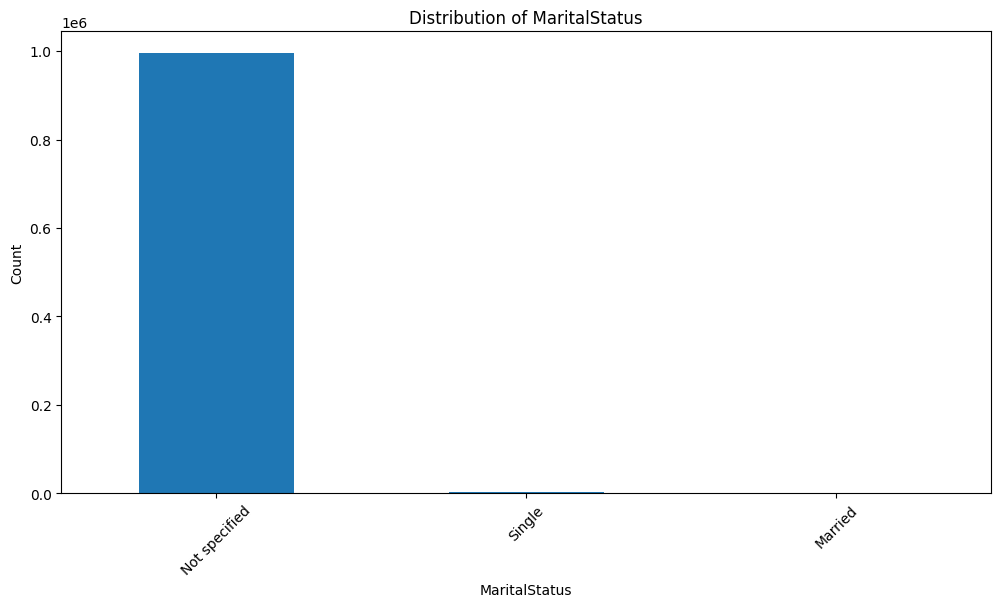

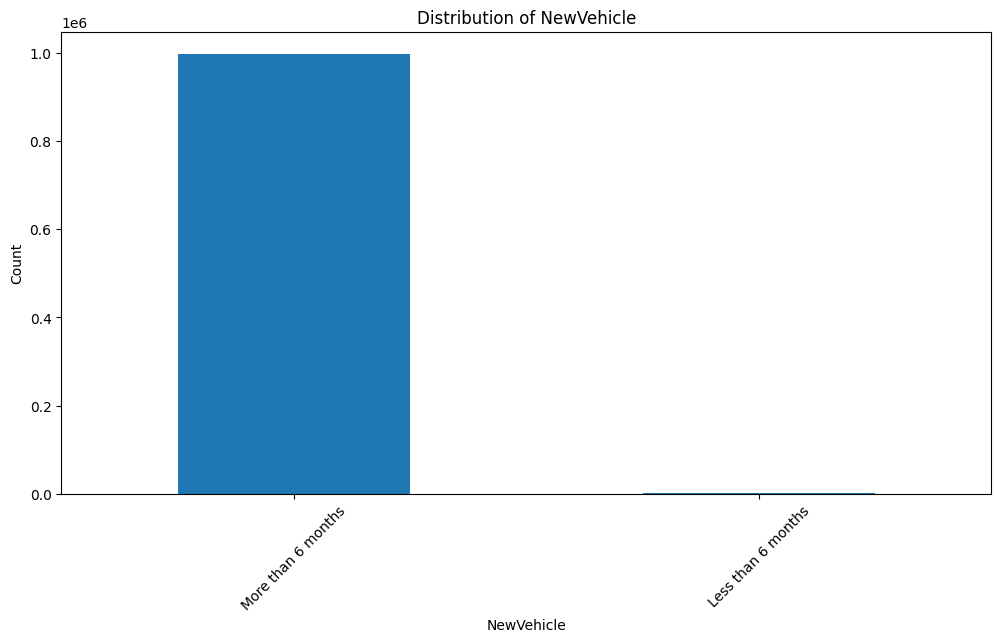

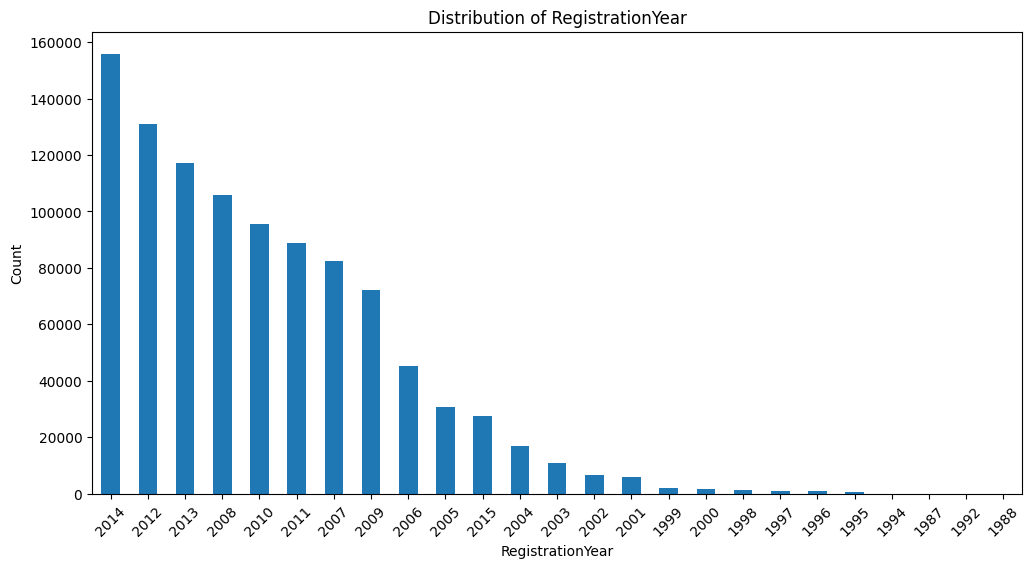

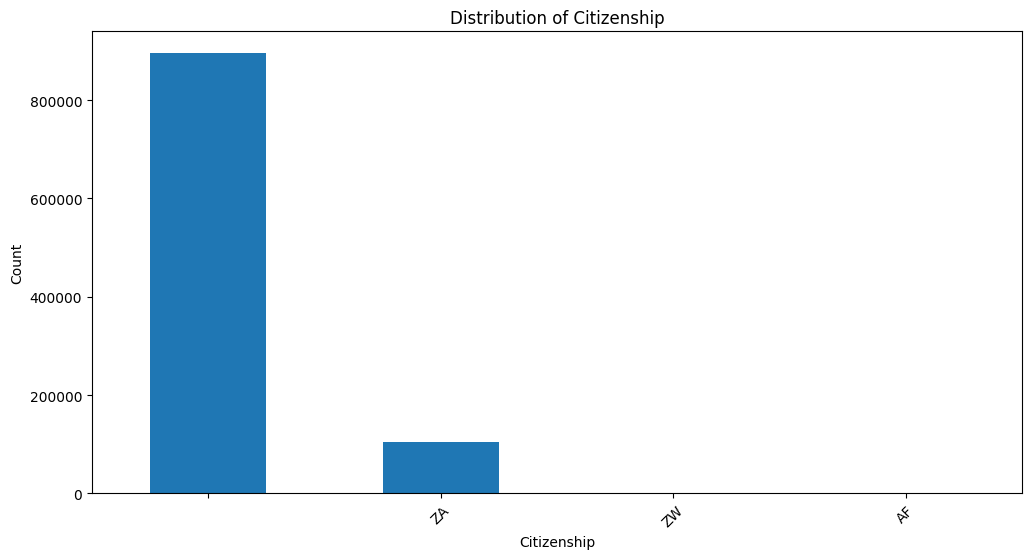

In [32]:
categorical_columns=['Province', 'VehicleType',  'Gender', 'MaritalStatus', 'NewVehicle', 'RegistrationYear','Citizenship' ]


# Plot bar charts for categorical columns
for col in categorical_columns:
    plot_bar_chart(data, col)

**Insights from the univariate analysis of numeric columns:**<br>

- There is a wide distribution across different postal codes, indicating geographical diversity in the customer base.<br>
- Certain vehicle types (such as passenger vehicles) and makes (e.g., Toyota) are overrepresented in the data, suggesting these vehicles are insured more frequently.<br>
- Males tend to be more frequently represented as policyholders than females.<br>

# Bivariate Analysis

Use scatter plots and correlation heatmaps to understand relationships between variables.

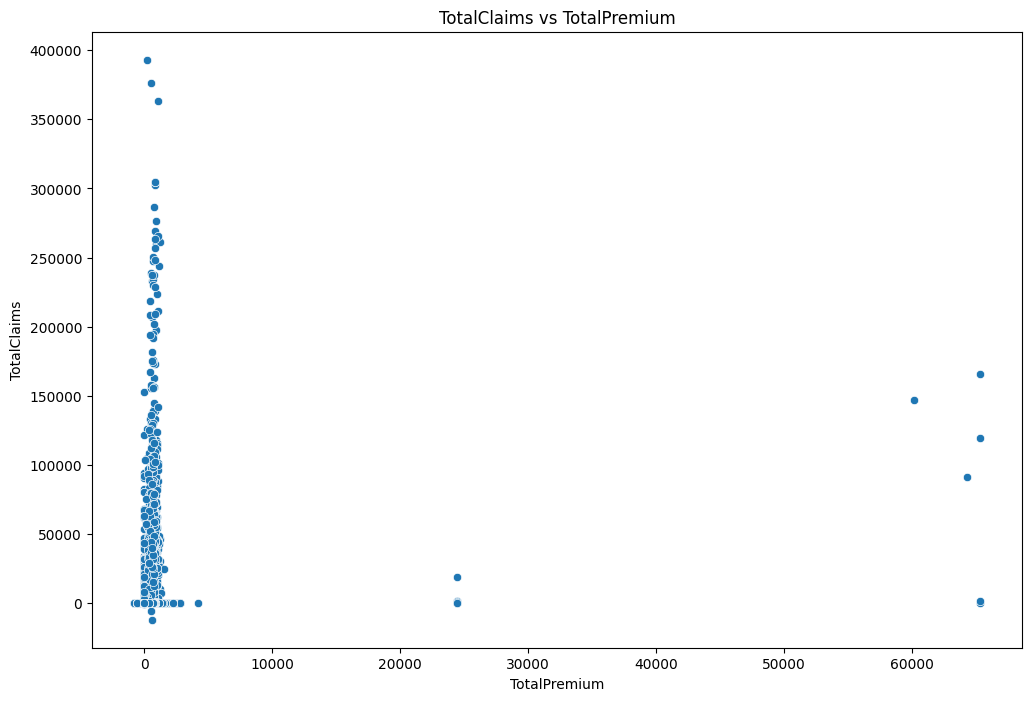

In [33]:
plot_scatter(data, 'TotalPremium', 'TotalClaims')

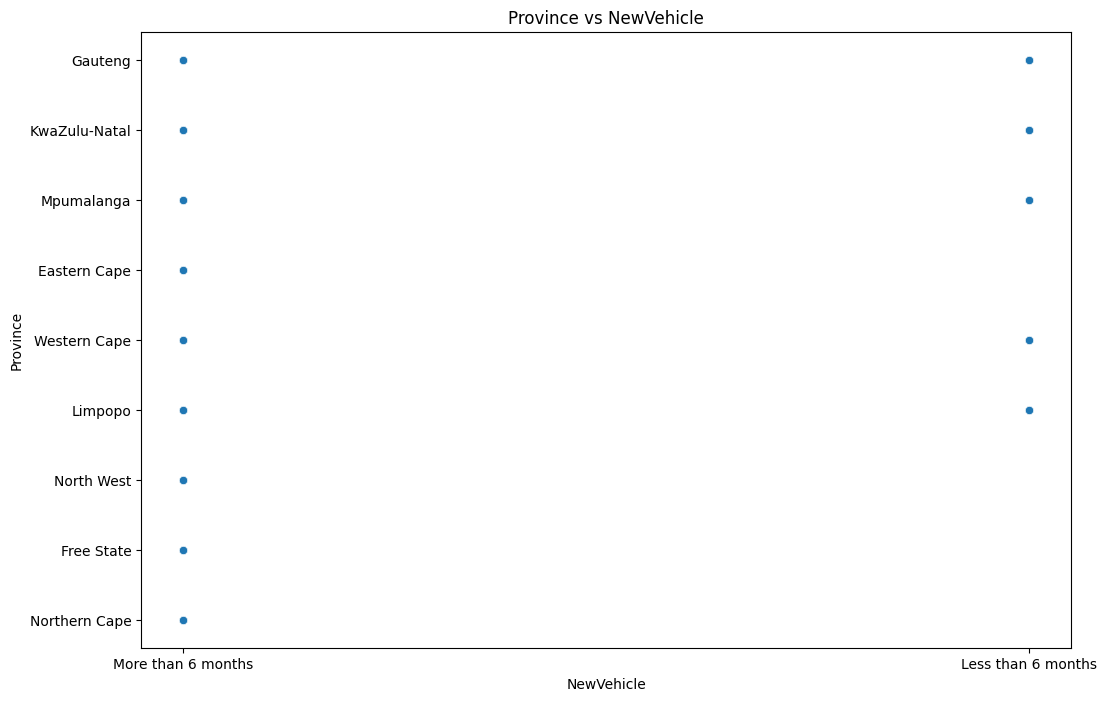

In [34]:
plot_scatter(data, 'NewVehicle', 'Province')

**Examine the correlation between different attributes in our dataset.**

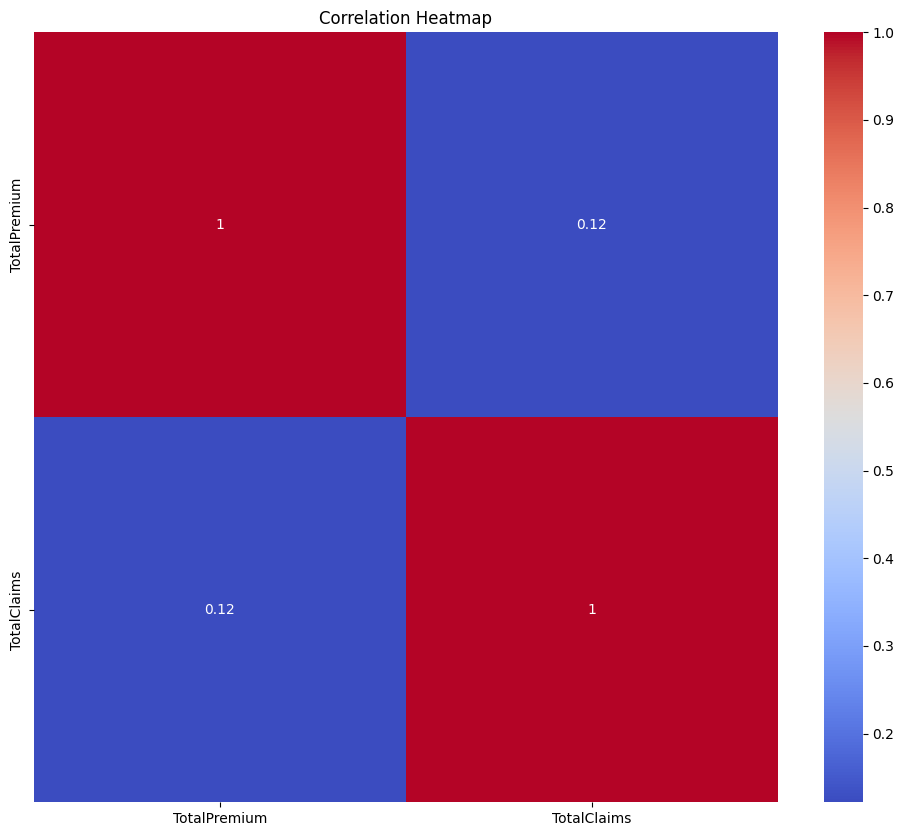

In [35]:
plot_correlation_heatmap(data, ['TotalPremium', 'TotalClaims'])

===> **Based on the plot, it can be observed that the correlation between TotalPremium and TotalClaims is positive but weak, with a correlation coefficient of 0.12. This suggests that higher premiums generally result in higher claims, though there is significant variability.**

# Correlation between numerical columns

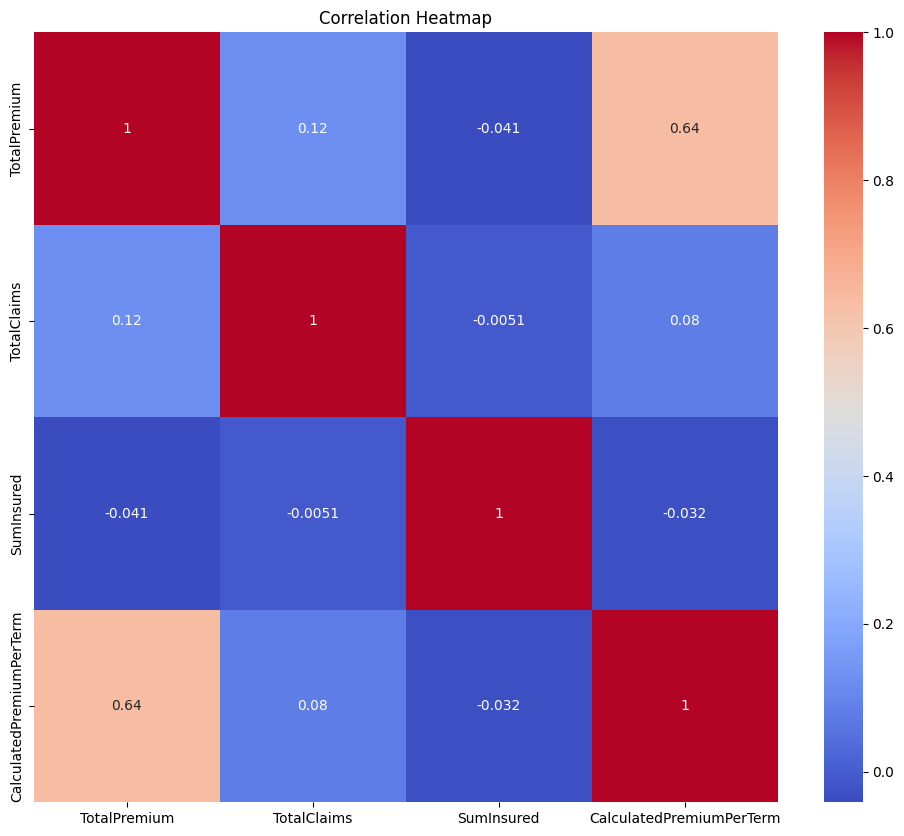

In [36]:
plot_correlation_heatmap(data, numerical_columns)

**===> From the correlation heatmap, we can see that:**

- TotalPremium is strongly correlated with CalculatedPremiumPerTerm (0.64).
- TotalClaims shows weak correlations with the other variables, with a slight positive correlation to TotalPremium (0.12).
- SumInsured shows almost no significant correlation with the other variables.

# Multivariate Analysis

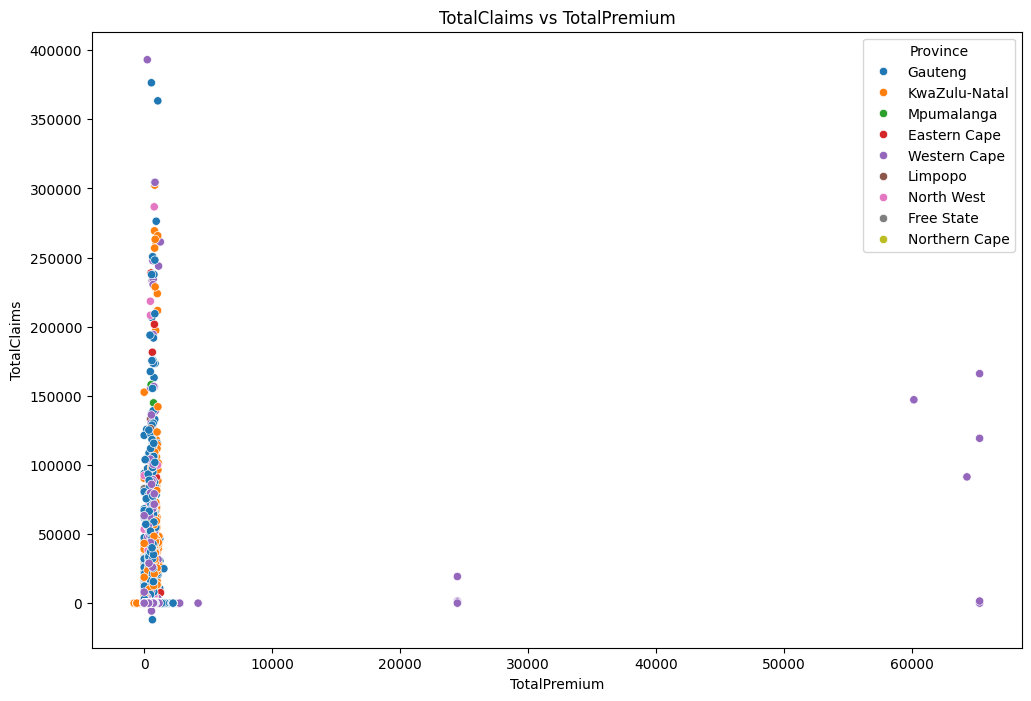

Correlation Matrix of TotalPremium vs TotalClaims by Province
Province
Eastern Cape     0.059646
Free State       0.054746
Gauteng          0.092761
KwaZulu-Natal    0.101787
Limpopo          0.053468
Mpumalanga       0.073857
North West       0.069032
Northern Cape    0.074800
Western Cape     0.203678
Name: TotalPremium, dtype: float64


In [37]:
plot_scatter(data, 'TotalPremium', 'TotalClaims', 'Province')

# Correlation matrix
correlation_matrix_province = data.groupby('Province')[['TotalPremium', 'TotalClaims']].corr().unstack()['TotalClaims']['TotalPremium']

print("Correlation Matrix of TotalPremium vs TotalClaims by Province")
print(correlation_matrix_province)

**===> From the Multivariate Analysis:**

- There are noticeable differences in claim patterns across provinces. For example, Gauteng and Western Cape exhibit the highest claims relative to premiums.
- The majority of data points (across most provinces) are clustered near the lower range of the TotalPremium axis, indicating generally lower premiums.
- Provinces like Western Cape, which have both high TotalPremium and high TotalClaims, imply higher risks in those areas.

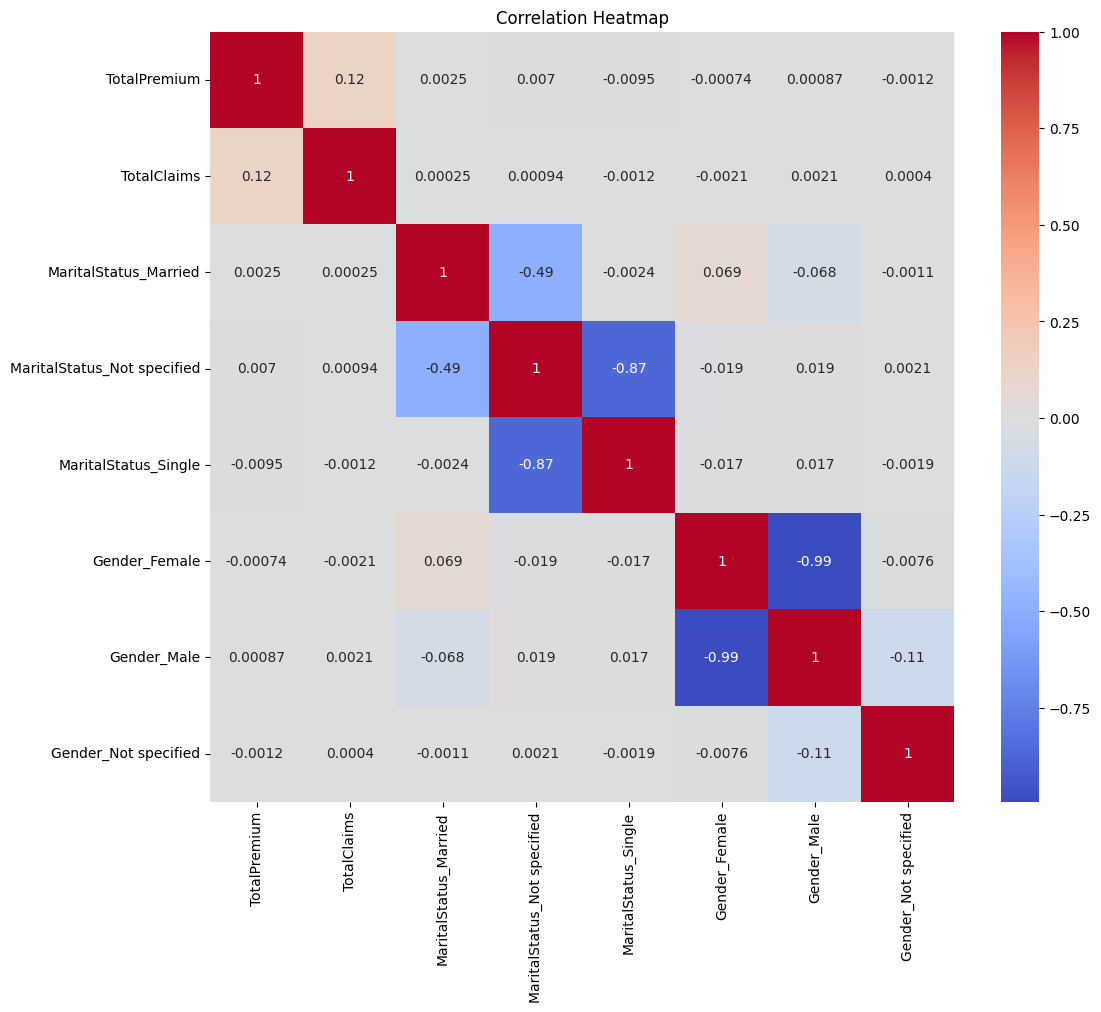

In [38]:
columns=['TotalPremium', 'TotalClaims', 'MaritalStatus', 'Gender']
columns_data = data[columns]

columns_data = pd.get_dummies(columns_data, columns=['MaritalStatus', 'Gender'])
plot_correlation_heatmap(columns_data, columns_data.columns)

The correlation between "Gender_Female" and "TotalPremium" is approximately -0.00074. This indicates a very weak negative correlation, suggesting that being female has almost no direct linear impact on the total premium paid.<br>
**Correlation with Gender_Male:** Similarly, the correlation between "Gender_Male" and "TotalPremium" is approximately 0.00087, indicating an almost negligible positive correlation. This means being male also shows no significant linear effect on the total premium.<br>
**===> Overall Analysis:** There seems to be almost no difference between male and female customers regarding the total premium paid.<br>

The correlation between "Gender_Female" and "TotalClaims" is approximately -0.0021, suggesting a very weak negative relationship. This implies that female customers might slightly tend to have fewer claims, but the effect is negligible.<br>
The correlation between "Gender_Male" and "TotalClaims" is approximately 0.0021, indicating a very slight positive relationship. This suggests that male customers might have marginally more claims.<br>
**===> Overall Analysis:** The correlations indicate that there is no substantial difference in the number of claims between male and female customers. The correlations are extremely close to zero, implying no strong linear relationship.<br>

# Data Comparison

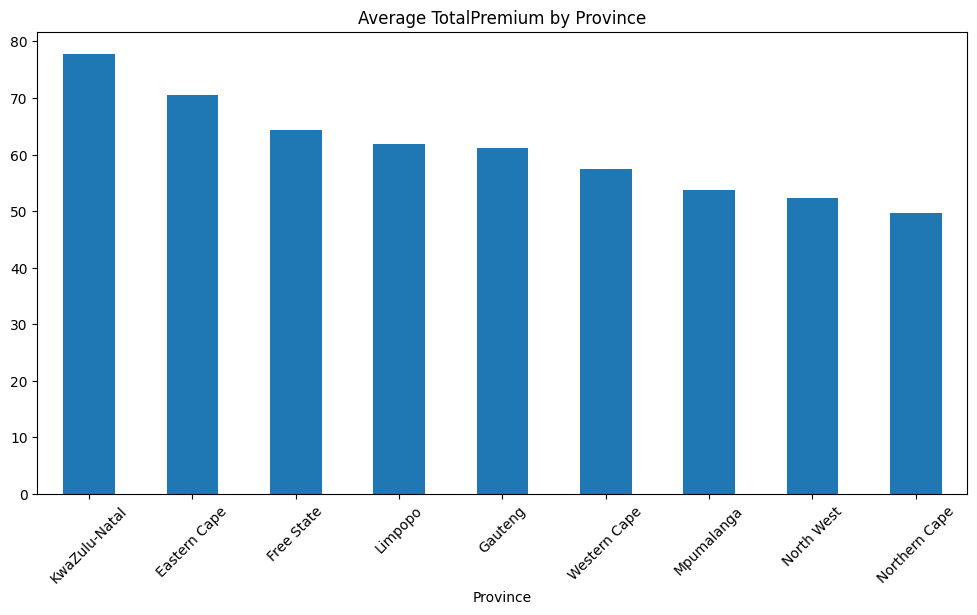

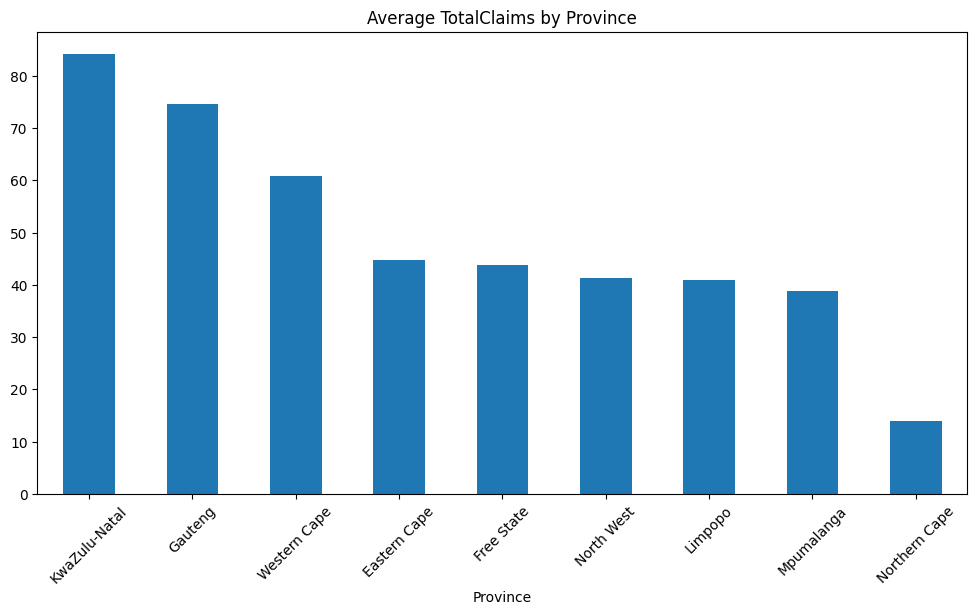

In [39]:
trend_over_geography(data, 'Province', 'TotalPremium')
trend_over_geography(data, 'Province', 'TotalClaims')

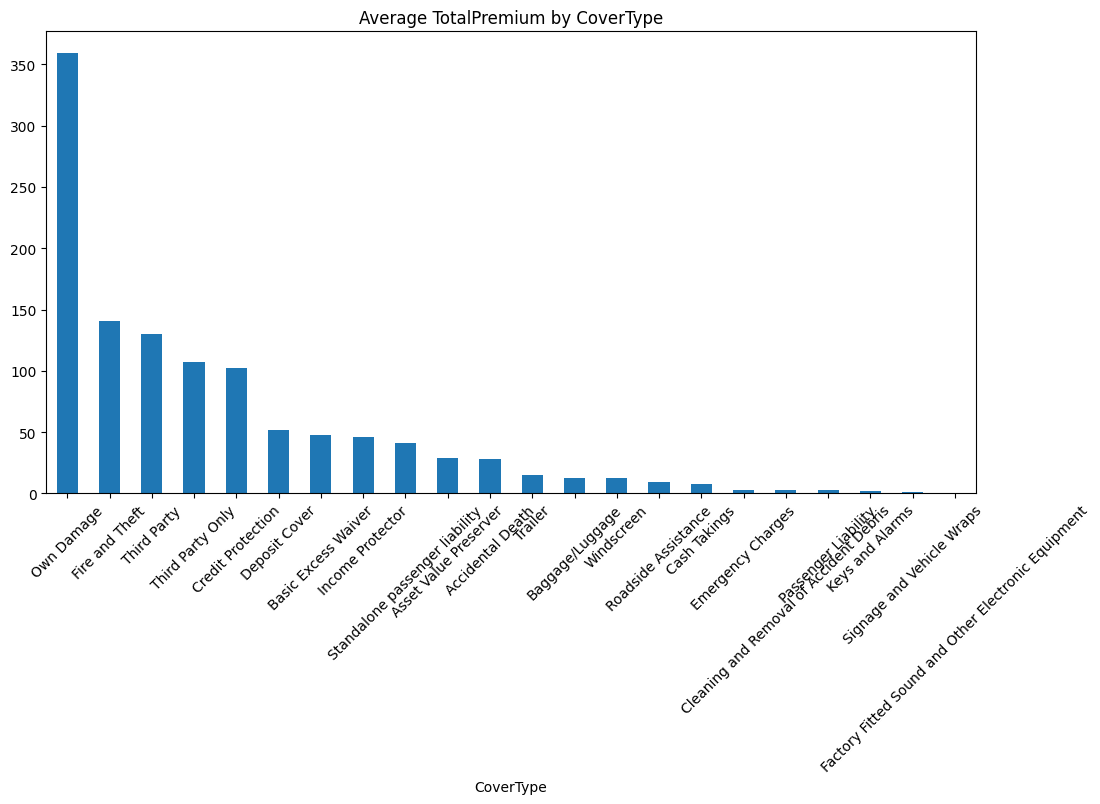

In [40]:
trend_over_geography(data, 'CoverType', 'TotalPremium')

# Outlier Detection

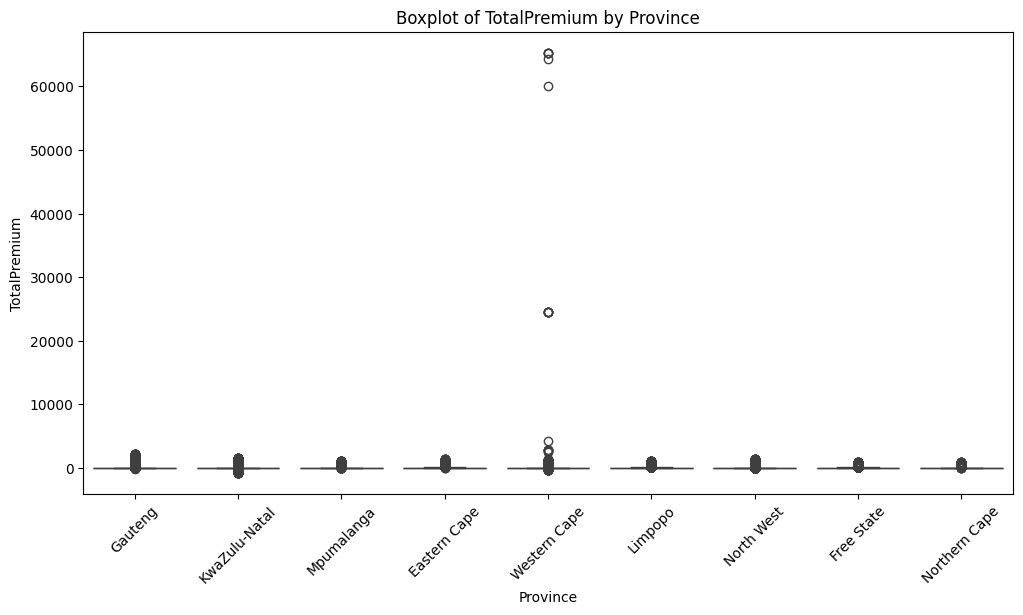

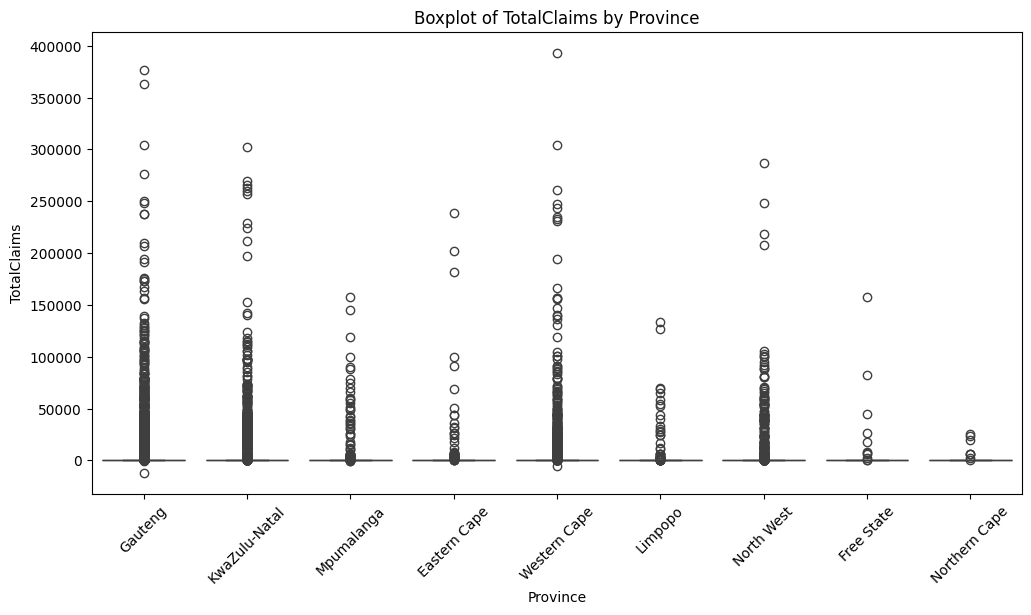

In [41]:
for col in ['TotalPremium', 'TotalClaims']:
    plot_boxplot(data, 'Province', col)

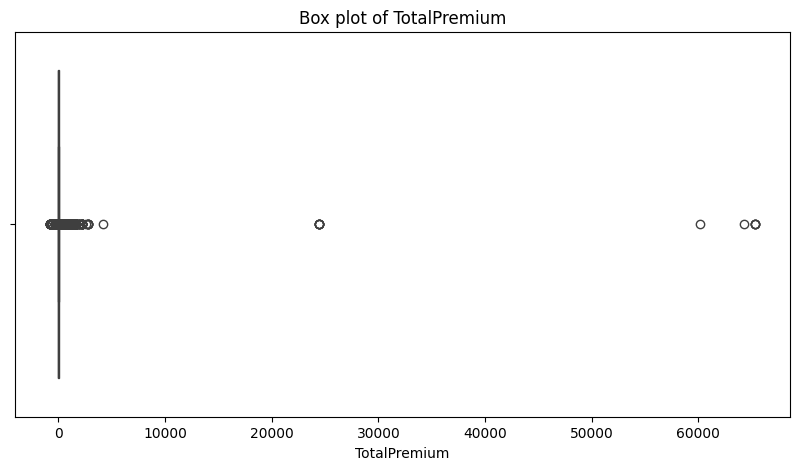

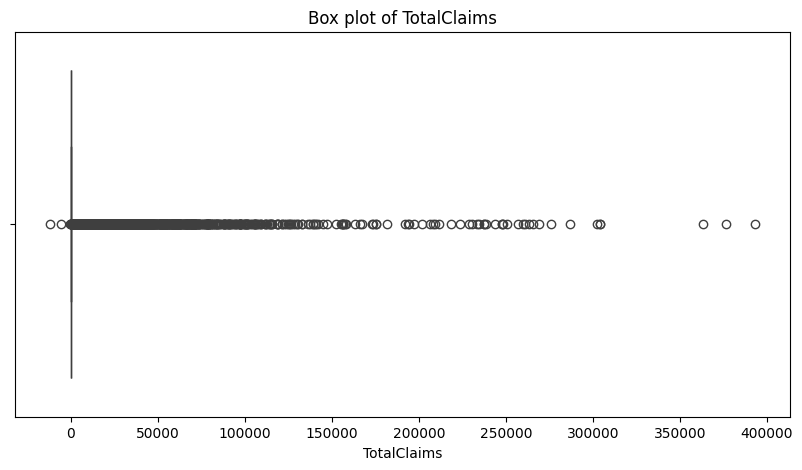

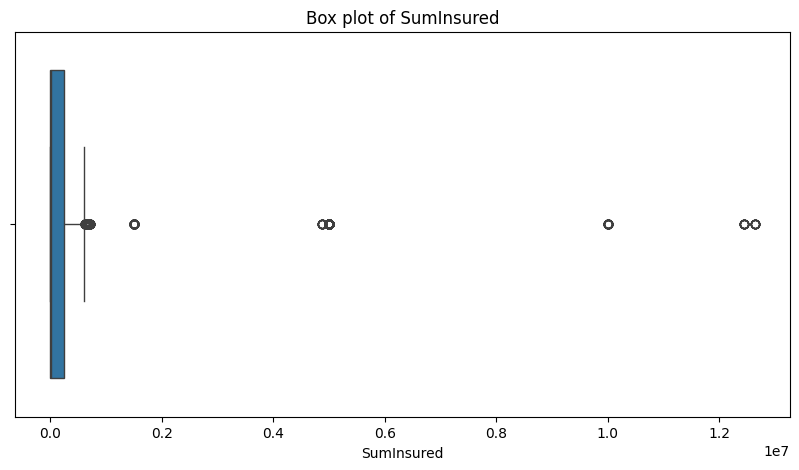

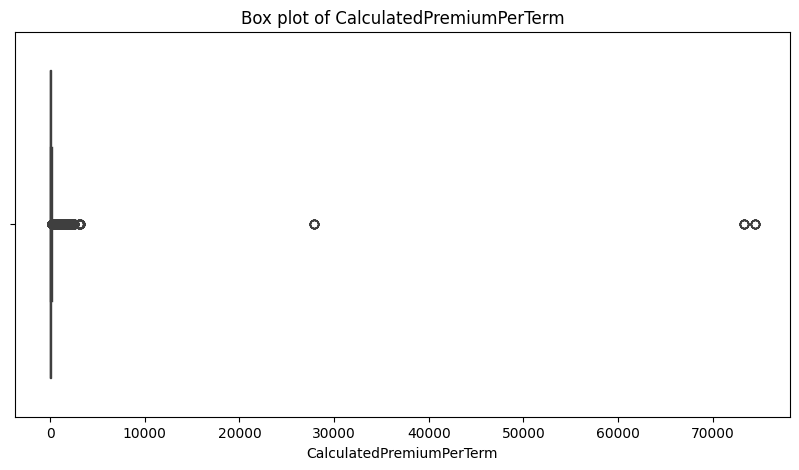

In [42]:
data_numerical_cols = data[numerical_columns]
outlier_box_plots(data_numerical_cols)

**===> Insights from the outlier detection:**

- There are significant outliers in TotalPremium and TotalClaims, with some extremely high values.
- SumInsured and CalculatedPremiumPerTerm also show outliers, though they are less extreme compared to TotalPremium and TotalClaims.

# Visualization

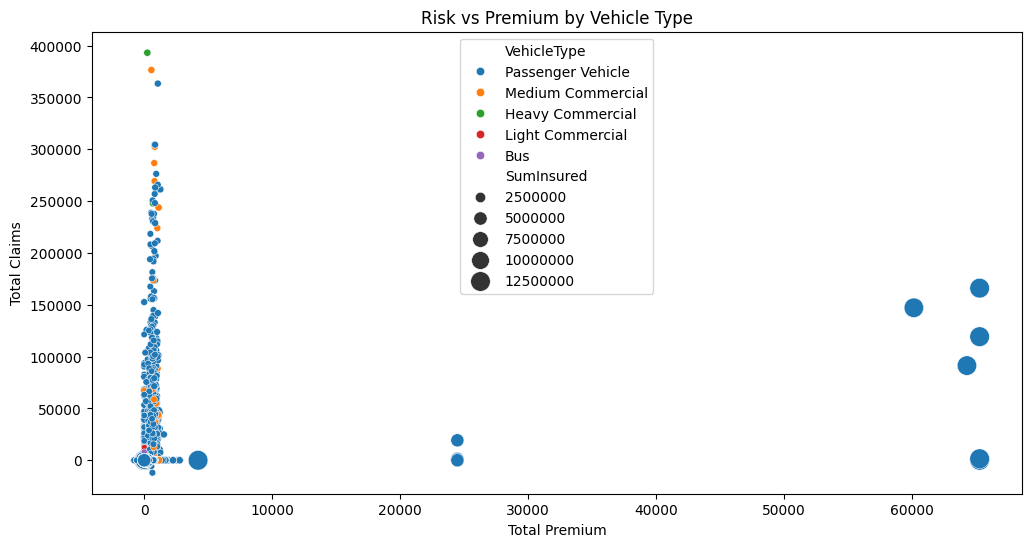

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data, x='TotalPremium', y='TotalClaims', hue='VehicleType', size='SumInsured', sizes=(20, 200))
plt.title('Risk vs Premium by Vehicle Type')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(loc='upper center')
plt.show()

- The majority of the data points are clustered at the lower end of both the TotalPremium and TotalClaims axes, indicating that most vehicles pay relatively low premiums and incur low total claims.  
- Medium Commercial, Heavy Commercial, and Light Commercial vehicles are scattered more sporadically among the lower premium and claim amounts.  
- There are instances where passenger vehicles show high premiums and relatively high claims.

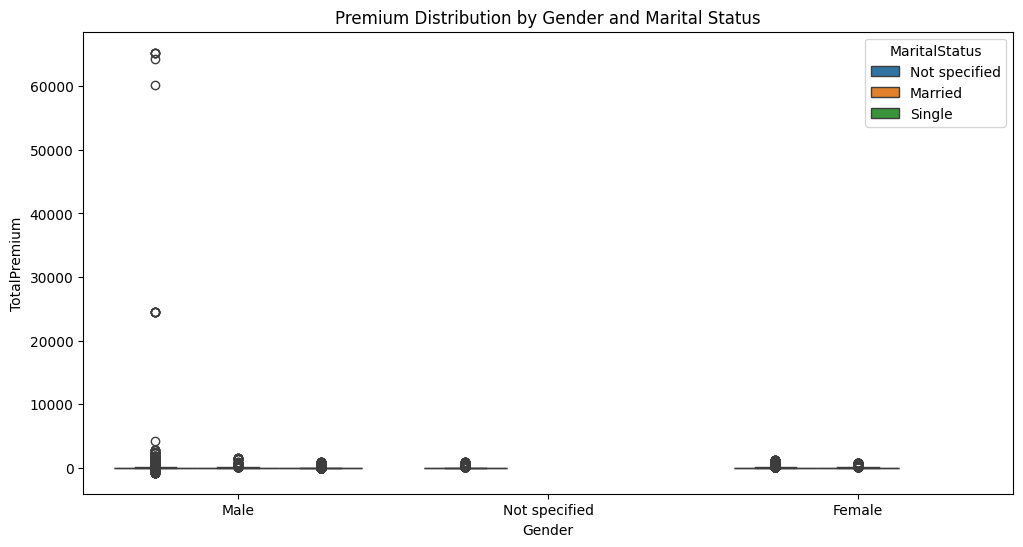

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data, x='Gender', y='TotalPremium', hue='MaritalStatus')
plt.title('Premium Distribution by Gender and Marital Status')
plt.show()

# Outlier Capping Using IQR Method

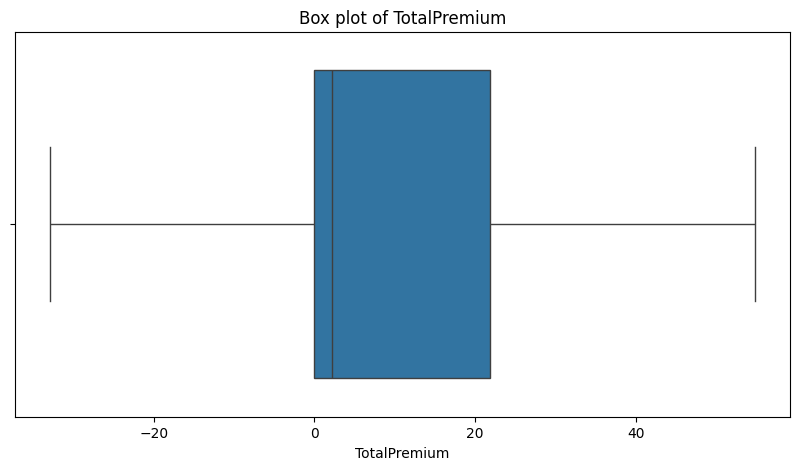

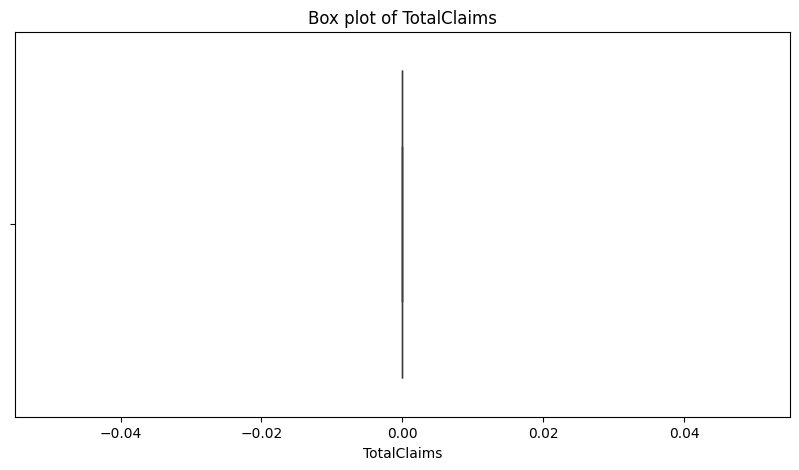

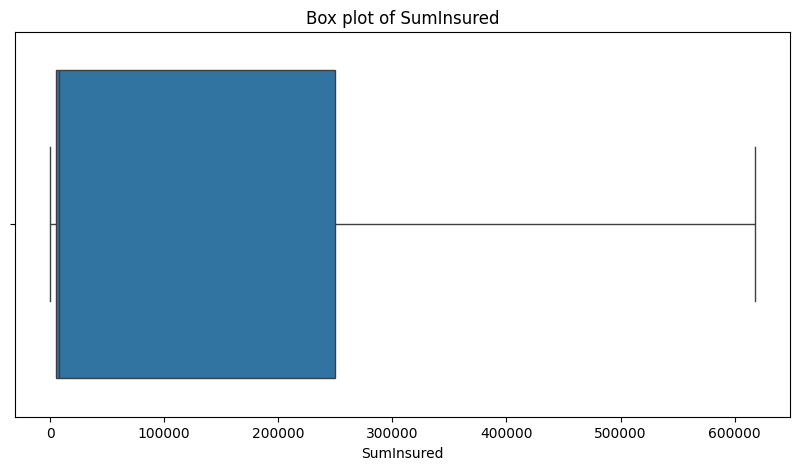

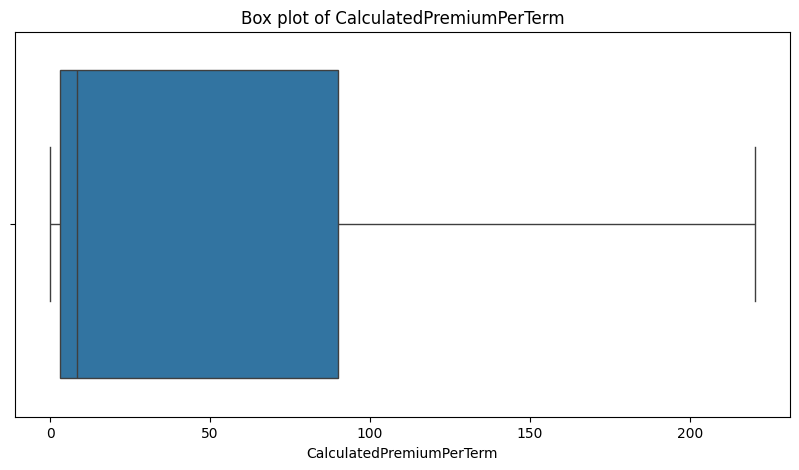

In [46]:
data_capped = cap_outliers(data, numerical_columns)
outlier_box_plots(data_capped[numerical_columns])

In [47]:
data_capped.to_csv('../data/cleaned_insurance_data.csv')

**===> Summary of Findings:**

- Risk factors vary across provinces and demographics.
- Premium pricing patterns highlight differences based on geography and customer characteristics.
- Claims distribution shows a relationship with premiums, with certain regions and demographics exhibiting higher claims relative to premiums.
- Geographic trends reveal variations in risk and pricing across different provinces.
- Vehicle characteristics, such as type and make, significantly influence both premiums and claims.
- Additional insights may be valuable for optimizing marketing strategies and identifying low-risk targets for better risk management.